In [1]:
import os
#from pathlib import Path

# HOME_DIR = str(Path.home())
HOME_DIR = 'D:/jupyter_dir'

ANNO_DIR = os.path.join(HOME_DIR, 'DLCV/data/balls_n_person/annotations')
IMAGE_DIR = os.path.join(HOME_DIR, 'DLCV/data/balls_n_person/images')

In [2]:
%cd D:\jupyter_dir\DLCV\data\balls_n_person\annotations
!cat 000aa58056ae2b02.xml

D:\jupyter_dir\DLCV\data\balls_n_person\annotations
<annotation>
  <folder>Football_Tennis_ball_Person</folder>
  <filename>000aa58056ae2b02.jpg</filename>
  <path>D:\jupyter_dir\DLCV\data\OIDv4_ToolKit\OID\Dataset\train\Football_Tennis_ball_Person\000aa58056ae2b02.jpg</path>
  <source>
    <database>Unknown</database>
  </source>
  <size>
    <width>683</width>
    <height>1024</height>
    <depth>3</depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>Tennis_ball</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
      <xmin>372</xmin>
      <ymin>101</ymin>
      <xmax>391</xmax>
      <ymax>120</ymax>
    </bndbox>
  </object>
</annotation>


In [3]:
import glob
import xml.etree.ElementTree as ET

classes_map = {'Football':0, 'Tennis_ball':1, 'Person':2}

# voc xml -> yolo csv
def xml_to_csv(path, output_filename):
    xml_list = []
    # xml 확장자 가진 모든 파일의 절대경로로 xml_file할당
    with open(output_filename, 'w') as train_csv_file:
        for xml_file in glob.glob(path + '/*.xml'):
            # xml file parsing and make Element Tree - extract object information
            tree = ET.parse(xml_file)
            root = tree.getroot()
            full_image_name = os.path.join(IMAGE_DIR, root.find('filename').text)
            value_str_list = ' '
            for obj in root.findall('object'):
                xmlbox = obj.find('bndbox')
                class_name = obj.find('name').text
                x1 = int(xmlbox.find('xmin').text)
                y1 = int(xmlbox.find('ymin').text)
                x2 = int(xmlbox.find('xmax').text)
                y2 = int(xmlbox.find('ymax').text)
                class_id = classes_map[class_name]
                value_str = f'{x1},{y1},{x2},{y2},{class_id}'
                value_str_list += value_str + ' '
            train_csv_file.write(full_image_name + value_str_list + '\n')

In [4]:
xml_to_csv(ANNO_DIR, os.path.join(ANNO_DIR, 'ballnperson_anno.csv'))

In [5]:
!cat ballnperson_anno.csv

D:/jupyter_dir\DLCV/data/balls_n_person/images\000aa58056ae2b02.jpg 372,101,391,120,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\0012ca60c774547e.jpg 462,166,483,187,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\001a8a1a132eeed0.jpg 392,426,405,438,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\001a98cdcee83e16.jpg 168,253,214,280,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\003742607cd6cc51.jpg 647,384,658,397,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00400701ea92d1d2.jpg 234,477,282,526,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\005e1e38ce277f78.jpg 455,378,502,435,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\0080284307d979d2.jpg 0,184,102,299,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00a8d854441ef854.jpg 90,544,193,638,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00c0076b670e711b.jpg 486,337,588,440,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00c3e62fb6726082.jpg 461,152,479,170,1 462,149,481,172,1 
D:/jupyter_dir\DLCV/data/bal

D:/jupyter_dir\DLCV/data/balls_n_person/images\3146f51d1c3a24b2.jpg 226,15,426,657,2 98,244,188,401,2 168,134,209,207,2 215,124,245,203,2 346,83,463,414,2 479,69,535,191,2 494,279,569,476,2 501,103,602,202,2 609,98,653,184,2 648,112,687,184,2 676,98,751,180,2 745,35,812,172,2 776,49,883,168,2 872,14,968,175,2 
D:/jupyter_dir\DLCV/data/balls_n_person/images\3177d5d24db7f2e0.jpg 694,430,877,614,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\31f7be5e3dda70b1.jpg 63,102,805,1023,2 
D:/jupyter_dir\DLCV/data/balls_n_person/images\328aea82d2162375.jpg 0,116,859,767,2 
D:/jupyter_dir\DLCV/data/balls_n_person/images\3332f2a1730e1120.jpg 173,342,196,362,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\3341bd091acaf670.jpg 231,754,349,870,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\3344e0dd4e29a52f.jpg 128,449,165,486,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\336076f29f639040.jpg 254,524,456,648,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\33a25d8a6bf9e797.jpg 189,507,379,7

In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(IMAGE_DIR, '87abdf7d3d089cb4.jpg')), cv2.COLOR_BGR2RGB))

NameError: name 'IMAGE_DIR' is not defined

In [2]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\fra

In [3]:
import sys, os

LOCAL_PACKAGE_DIR = 'D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3'.replace('\\', '/')
print(LOCAL_PACKAGE_DIR)
sys.path.append(LOCAL_PACKAGE_DIR)

D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3


In [9]:
#%cd D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3
#!wget https://pjreddie.com/media/files/yolov3.weights

#!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3

Using TensorFlow backend.
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\tensorflow\python\fra

__________________________________________________________________________________________________
add_10 (Add)                    (None, None, None, 2 0           add_9[0][0]                      
                                                                 leaky_re_lu_24[0][0]             
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, None, None, 1 32768       add_10[0][0]                     
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, None, None, 1 512         conv2d_25[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_25 (LeakyReLU)      (None, None, None, 1 0           batch_normalization_25[0][0]     
__________________________________________________________________________________________________
conv2d_26 

In [9]:
from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

In [10]:
# modify ballnperson_classes.txt
BASE_DIR = os.path.join(HOME_DIR, 'DLCV/Detection/yolo/keras-yolo3')
classes_path = os.path.join(BASE_DIR, 'model_data/ballnperson_classes.txt')
with open(classes_path, 'w') as f:
    f.write('Football\nTennis_ball\nPerson')

!cat D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3\model_data\ballnperson_classes.txt

Football
Tennis_ball
Person


In [11]:
from train import get_classes, get_anchors
from train import create_model, data_generator, data_generator_wrapper

BASE_DIR = os.path.join(HOME_DIR, 'DLCV/Detection/yolo/keras-yolo3')

## annotation file path, epoch model save path, object class file path, anchor file path
annotation_path = os.path.join(ANNO_DIR, 'ballnperson_anno.csv')
log_dir = os.path.join(BASE_DIR, 'snapshots/ballnperson/')
classes_path = os.path.join(BASE_DIR, 'model_data/ballnperson_classes.txt')
anchors_path = os.path.join(BASE_DIR, 'model_data/yolo_anchors.txt')

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
print(class_names, num_classes)
print(anchors)

['Football', 'Tennis_ball', 'Person'] 3
[[ 10.  13.]
 [ 16.  30.]
 [ 33.  23.]
 [ 30.  61.]
 [ 62.  45.]
 [ 59. 119.]
 [116.  90.]
 [156. 198.]
 [373. 326.]]


#### Set parameters for yolo model training as config class 
if necessary, modifying and train

In [12]:
# read csv annotation file and convert to list ( lines )
with open(annotation_path) as f:
    lines = f.readlines()
    
class config:
    #initial weights
    initial_weights_path=os.path.join(BASE_DIR, 'model_data/yolo.h5' )
    # input_shape는 고정. 
    input_shape=(416, 416)
    # epochs는 freeze, unfreeze 2 step에 따라 설정. 
    first_epochs=50
    first_initial_epochs=0
    second_epochs=100
    second_initial_epochs=50
    # batch size, train,valid count, epoch steps   
    batch_size = 4
    val_split = 0.1   
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val
    train_epoch_steps = num_train//batch_size 
    val_epoch_steps =  num_val//batch_size
    
    anchors = get_anchors(anchors_path)
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    # epoch시 저장된 weight 파일 디렉토리 
    log_dir = os.path.join(BASE_DIR, 'snapshots/ballnperson/')
    
print('Class name:', config.class_names,'\nNum classes:', config.num_classes)

Class name: ['Football', 'Tennis_ball', 'Person'] 
Num classes: 3


#### csv file -> data_generator_wrapper objects for train and vaild data   
fit_generator()의 인자

In [13]:
def create_generator(lines):
    
    train_data_generator = data_generator_wrapper(lines[:config.num_train], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes)
    
    valid_data_generator = data_generator_wrapper(lines[config.num_train:], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes)
    
    return train_data_generator, valid_data_generator

pretrained weights로 yolo model 반환

In [14]:
def create_yolo_model():
    is_tiny_version = len(config.anchors)==6 
    if is_tiny_version:
        model = create_tiny_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
    else:
        model = create_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
        
    return model

#### callbacks

In [15]:
def create_callbacks():
    logging = TensorBoard(log_dir=config.log_dir)
    checkpoint = ModelCheckpoint(config.log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                 monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
    
    # return as list
    return [logging, checkpoint, reduce_lr, early_stopping]

## train

In [17]:
train_data_generator, valid_data_generator = create_generator(lines)
ballnperson_model = create_yolo_model()
callback_list = create_callbacks()

Instructions for updating:
Colocations handled automatically by placer.
Create YOLOv3 model with 9 anchors and 3 classes.


D:\Anaconda3\envs\tf113_h5py\lib\site-packages\keras\engine\saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 24) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\keras\engine\saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((24,) vs (255,)).
  weight_values[i].shape))
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\keras\engine\saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 24) vs (255, 512, 1, 1)).
  weight_values[i].shape))
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\keras\engine\saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((24,) vs (255,)).
  weight_values[i].shape))
D:\Anaconda3\envs\tf113_h5py\lib\site-packages\keras\engine\saving.py:1008: UserWarning: Skipping loading of weights for layer

Load weights D:/jupyter_dir\DLCV/Detection/yolo/keras-yolo3\model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.


In [24]:
print('### First train start ###')
ballnperson_model.compile(optimizer=Adam(lr=1e-3), loss={'yolo_loss':lambda y_true, y_pred: y_pred})
ballnperson_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                                validation_data= valid_data_generator, validation_steps = config.val_epoch_steps,
                                epochs=config.first_epochs, initial_epoch=config.first_initial_epochs, callbacks=callback_list)

ballnperson_model.save_weights(log_dir + 'trained_weights_stage_1.h5')



Create YOLOv3 model with 9 anchors and 3 classes.
Load weights D:/jupyter_dir\DLCV/Detection/yolo/keras-yolo3\model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.
### First train start ###
Epoch 1/50
202/202 [==============================] - 276s 1s/step - loss: 588.5556 - val_loss: 79.9819
Epoch 2/50
202/202 [==============================] - 272s 1s/step - loss: 64.7830 - val_loss: 54.6111
Epoch 3/50
202/202 [==============================] - 271s 1s/step - loss: 47.9928 - val_loss: 45.3369
Epoch 4/50
202/202 [==============================] - 272s 1s/step - loss: 41.4642 - val_loss: 41.7395
Epoch 5/50
202/202 [==============================] - 272s 1s/step - loss: 38.4338 - val_loss: 39.4260
Epoch 6/50
202/202 [==============================] - 272s 1s/step - loss: 36.9254 - val_loss: 42.2027
Epoch 7/50
202/202 [==============================] - 272s 1s/step - loss: 34.3101 - val_loss: 35.7294
Epoch 8/50
202/202 [==============================] - 272s 1s/step - loss

ResourceExhaustedError: OOM when allocating tensor with shape[32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_1/Adam/mul_6}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_1/add_74}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
for i in range(len(ballnperson_model.layers)):
    ballnperson_model.layers[i].trainable = True
    
print('### Second train start ###')
ballnperson_model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss':lambda y_true, y_pred: y_pred})
ballnperson_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                                validation_data= valid_data_generator, validation_steps = config.val_epoch_steps,
                                epochs=config.second_epochs, initial_epoch=config.second_initial_epochs, callbacks=callback_list)

ballnperson_model.save_weights(log_dir + 'trained_weights_final.h5')

### Second train start ###
Epoch 51/100


Second train에서 OOM 발생하여  colab으로 train 진행

In [4]:
LOCAL_PACKAGE_DIR = os.path.abspath('./keras-yolo3')
print(LOCAL_PACKAGE_DIR)

from yolo import YOLO
from PIL import Image

D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3


In [5]:
ballnperson_yolo = YOLO(model_path='D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3/snapshots/ballnperson/trained_weights_final.h5',
                        anchors_path='D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3/model_data/yolo_anchors.txt',
                        classes_path='D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3/model_data/ballnperson_classes.txt')


Instructions for updating:
Colocations handled automatically by placer.
D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3/snapshots/ballnperson/trained_weights_final.h5 model, anchors, and classes loaded.


In [10]:
import glob
images = glob.glob('D:/jupyter_dir/DLCV/data/balls_n_person/images/*.jpg')
images

['D:/jupyter_dir/DLCV/data/balls_n_person/images\\000aa58056ae2b02.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\0012ca60c774547e.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\001a8a1a132eeed0.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\001a98cdcee83e16.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\003742607cd6cc51.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00400701ea92d1d2.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\005e1e38ce277f78.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\0080284307d979d2.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00a8d854441ef854.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00c0076b670e711b.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00c3e62fb6726082.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00c4e77f0d17b642.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\00dcc5aaae504689.jpg',
 'D:/jupyter_dir/DLCV/data/balls_n_person/images\\0

In [12]:
n = np.random.randint(900, size=5)
print(n)

[466 388  74 756 383]


(416, 416, 3)
Found 2 boxes for img
Person 0.82 (433, 269) (565, 669)
Person 0.95 (190, 52) (500, 666)
0.7581504000000336
(416, 416, 3)
Found 0 boxes for img
0.4665738000000488
(416, 416, 3)
Found 1 boxes for img
Tennis_ball 0.86 (351, 29) (375, 52)
0.4802538999999797
(416, 416, 3)
Found 3 boxes for img
Person 0.57 (977, 201) (1023, 537)
Person 0.89 (167, 69) (297, 682)
Person 0.99 (636, 224) (753, 569)
0.4706224999999904
(416, 416, 3)
Found 1 boxes for img
Football 0.99 (329, 528) (368, 581)
0.4736530999999786


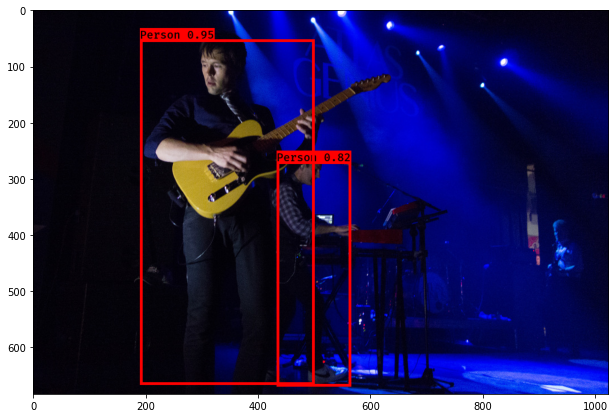

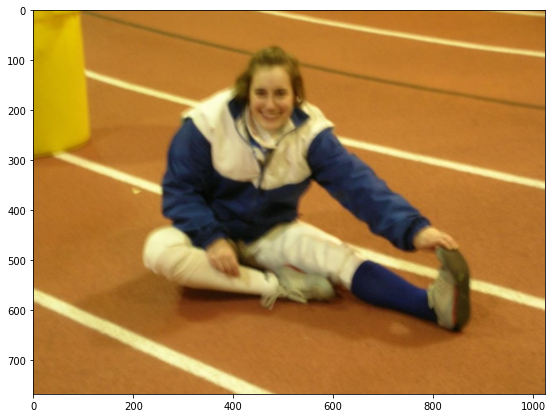

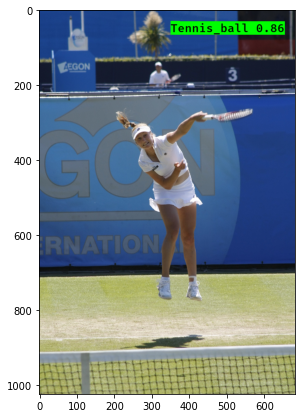

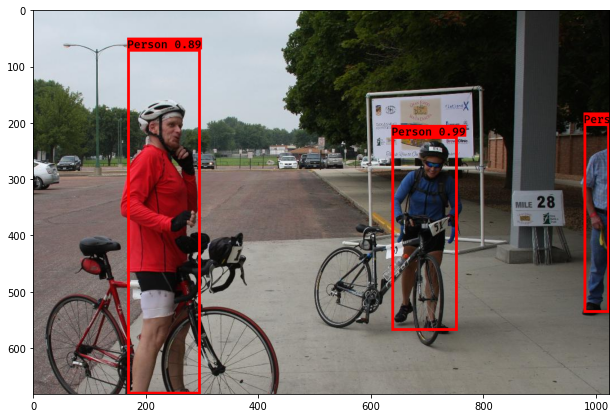

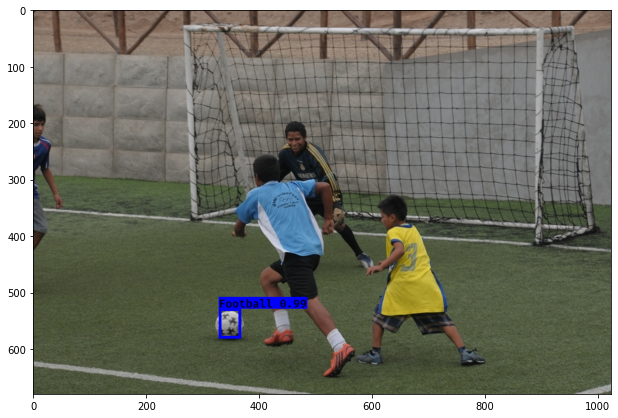

In [22]:
for i in range(len(n)):
    img = Image.open(images[n[i]])
    detected_img = ballnperson_yolo.detect_image(img)
    plt.figure(figsize=(24, 24))
    plt.imshow(detected_img)

#### Video object Detection

In [25]:
import cv2
import time

def detect_video_yolo(model, input_path, output_path=''):
    real_start = time.time()
    cap = cv2.VideoCapture(input_path)
    
    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    vid_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('Total Frame count:', frame_cnt)
    index = 0
    
    while True:
        hasFrame, frame = cap.read()
        if not hasFrame:
            print('No More Frame')
            break
        start = time.time()
        image = Image.fromarray(frame)
        detected_frame = model.detect_image(image)
        
        result = np.asarray(detected_frame)
        index+=1
        
        print('#### frame: {}, processing time: {}'.format(index, round(time.time()-start, 2)))
        vid_writer.write(result)
        
    vid_writer.release()
    cap.release()
    print('#### Total processing time:', round(time.time()-real_start, 5))

In [26]:
detect_video_yolo(ballnperson_yolo, 'D:/jupyter_dir/DLCV/data/video/football01.mp4',
                  'D:/jupyter_dir/DLCV/data/output/football01_yolo.avi')

Total Frame count: 669
(416, 416, 3)
Found 0 boxes for img
0.7573949999998604
#### frame: 1, processing time: 0.78
(416, 416, 3)
Found 0 boxes for img
0.47214839999992364
#### frame: 2, processing time: 0.48
(416, 416, 3)
Found 0 boxes for img
0.45660499999985404
#### frame: 3, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Football 0.89 (432, 373) (466, 432)
0.46319610000000466
#### frame: 4, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Football 0.94 (439, 358) (478, 446)
0.45922459999997045
#### frame: 5, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Person 0.37 (0, 30) (91, 444)
Football 0.81 (446, 364) (490, 441)
0.46197910000000775
#### frame: 6, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Person 0.32 (0, 22) (95, 452)
Football 0.65 (442, 374) (515, 427)
0.4687306999999237
#### frame: 7, processing time: 0.48
(416, 416, 3)
Found 1 boxes for img
Football 0.34 (451, 361) (520, 424)
0.46844609999993736
#### frame: 8, processing time: 

Found 2 boxes for img
Person 0.32 (548, 68) (585, 136)
Person 0.45 (625, 68) (661, 140)
0.4635877000000619
#### frame: 66, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Person 0.32 (544, 74) (559, 123)
Football 0.30 (549, 130) (559, 145)
0.462943100000075
#### frame: 67, processing time: 0.47
(416, 416, 3)
Found 0 boxes for img
0.45383220000007896
#### frame: 68, processing time: 0.46
(416, 416, 3)
Found 3 boxes for img
Person 0.40 (262, 90) (287, 180)
Person 0.45 (224, 148) (255, 237)
Person 0.45 (467, 47) (501, 113)
0.4674271999999746
#### frame: 69, processing time: 0.48
(416, 416, 3)
Found 4 boxes for img
Person 0.31 (607, 70) (652, 139)
Person 0.45 (540, 65) (563, 135)
Person 0.49 (464, 48) (498, 114)
Football 0.53 (544, 138) (558, 154)
0.4658741000000646
#### frame: 70, processing time: 0.47
(416, 416, 3)
Found 5 boxes for img
Person 0.32 (540, 67) (563, 136)
Person 0.35 (603, 69) (655, 140)
Person 0.38 (259, 98) (291, 175)
Person 0.59 (462, 47) (500, 117)
Football 0.

Found 5 boxes for img
Person 0.33 (562, 48) (593, 108)
Person 0.38 (734, 5) (772, 50)
Person 0.47 (596, 30) (626, 102)
Person 0.50 (0, 160) (17, 250)
Person 0.58 (316, 121) (350, 193)
0.4685527000001457
#### frame: 99, processing time: 0.48
(416, 416, 3)
Found 6 boxes for img
Person 0.33 (562, 47) (592, 108)
Person 0.35 (0, 157) (13, 254)
Person 0.37 (318, 125) (353, 187)
Person 0.43 (541, 112) (567, 193)
Person 0.45 (597, 29) (627, 102)
Person 0.47 (772, 92) (807, 145)
0.46436770000013894
#### frame: 100, processing time: 0.47
(416, 416, 3)
Found 5 boxes for img
Person 0.31 (324, 126) (356, 186)
Person 0.34 (561, 43) (592, 109)
Person 0.41 (543, 111) (570, 195)
Person 0.47 (598, 27) (628, 104)
Football 0.34 (525, 174) (534, 189)
0.4676652999999078
#### frame: 101, processing time: 0.47
(416, 416, 3)
Found 5 boxes for img
Person 0.35 (328, 122) (357, 191)
Person 0.39 (561, 42) (593, 110)
Person 0.42 (553, 113) (578, 194)
Person 0.42 (598, 27) (629, 103)
Football 0.41 (524, 175) (533, 1

Found 2 boxes for img
Person 0.39 (660, 8) (701, 51)
Person 0.55 (577, 23) (612, 91)
0.4647390999998606
#### frame: 136, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.42 (666, 9) (706, 45)
0.46003380000001926
#### frame: 137, processing time: 0.46
(416, 416, 3)
Found 3 boxes for img
Person 0.30 (584, 21) (622, 79)
Tennis_ball 0.35 (441, 189) (484, 227)
Football 0.30 (383, 402) (399, 422)
0.46339609999995446
#### frame: 138, processing time: 0.47
(416, 416, 3)
Found 3 boxes for img
Person 0.54 (588, 18) (623, 81)
Tennis_ball 0.30 (444, 189) (487, 229)
Football 0.32 (376, 411) (389, 427)
0.45760500000005777
#### frame: 139, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.59 (590, 19) (624, 79)
0.45332550000011906
#### frame: 140, processing time: 0.46
(416, 416, 3)
Found 2 boxes for img
Person 0.67 (591, 20) (627, 79)
Football 0.57 (359, 417) (373, 430)
0.45757559999992736
#### frame: 141, processing time: 0.47
(416, 416, 3)
Found 4 boxes for img
P

Found 1 boxes for img
Person 0.64 (342, 0) (705, 504)
0.4563035999999556
#### frame: 201, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.67 (338, 0) (706, 504)
0.45458159999998315
#### frame: 202, processing time: 0.46
(416, 416, 3)
Found 2 boxes for img
Person 0.33 (140, 42) (416, 362)
Person 0.79 (330, 0) (720, 504)
0.45673660000011296
#### frame: 203, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.67 (331, 8) (722, 504)
0.45470589999990807
#### frame: 204, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.57 (337, 12) (714, 503)
0.4541729000000032
#### frame: 205, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.54 (357, 9) (699, 504)
0.4587314999998853
#### frame: 206, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.66 (345, 5) (707, 504)
0.4670719000000645
#### frame: 207, processing time: 0.48
(416, 416, 3)
Found 1 boxes for img
Person 0.70 (360, 8) (702, 504)
0.47195590000001175
#### fr

Found 2 boxes for img
Person 0.32 (897, 63) (933, 175)
Person 0.46 (533, 199) (576, 284)
0.4571940999999242
#### frame: 260, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.41 (527, 196) (571, 287)
0.4632643999998436
#### frame: 261, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.33 (693, 105) (738, 196)
0.46651599999995597
#### frame: 262, processing time: 0.48
(416, 416, 3)
Found 2 boxes for img
Person 0.33 (882, 65) (915, 176)
Person 0.34 (583, 64) (628, 132)
0.46142829999985224
#### frame: 263, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Person 0.31 (505, 190) (556, 306)
Person 0.41 (881, 62) (909, 179)
0.4565405999999257
#### frame: 264, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.46 (677, 105) (720, 202)
0.4544611999999688
#### frame: 265, processing time: 0.46
(416, 416, 3)
Found 4 boxes for img
Person 0.32 (873, 68) (930, 179)
Person 0.36 (491, 196) (544, 302)
Person 0.38 (570, 54) (616, 143)
Person 0.4

Found 4 boxes for img
Person 0.39 (747, 339) (790, 465)
Person 0.41 (767, 199) (821, 298)
Person 0.43 (418, 183) (461, 298)
Person 0.49 (713, 72) (777, 186)
0.4759477000000061
#### frame: 299, processing time: 0.48
(416, 416, 3)
Found 4 boxes for img
Person 0.33 (402, 190) (447, 289)
Person 0.33 (734, 346) (777, 459)
Person 0.55 (624, 129) (666, 209)
Person 0.65 (706, 77) (762, 189)
0.4659526000000369
#### frame: 300, processing time: 0.47
(416, 416, 3)
Found 3 boxes for img
Person 0.32 (715, 346) (764, 466)
Person 0.32 (740, 209) (780, 304)
Person 0.33 (897, 228) (934, 368)
0.4585426000001007
#### frame: 301, processing time: 0.46
(416, 416, 3)
Found 4 boxes for img
Person 0.31 (711, 348) (759, 468)
Person 0.38 (895, 229) (933, 367)
Person 0.41 (609, 123) (653, 218)
Person 0.58 (735, 213) (772, 300)
0.46164329999987785
#### frame: 302, processing time: 0.47
(416, 416, 3)
Found 3 boxes for img
Person 0.30 (708, 348) (756, 473)
Person 0.53 (605, 127) (648, 217)
Person 0.59 (733, 210) (7

Found 11 boxes for img
Person 0.33 (657, 388) (710, 499)
Person 0.34 (834, 138) (866, 234)
Person 0.40 (626, 245) (668, 363)
Person 0.40 (56, 340) (107, 460)
Person 0.42 (649, 130) (679, 240)
Person 0.48 (313, 268) (353, 397)
Person 0.48 (556, 148) (602, 268)
Person 0.52 (522, 119) (556, 189)
Person 0.53 (861, 296) (900, 408)
Person 0.57 (357, 239) (384, 347)
Football 0.37 (781, 75) (786, 87)
0.47660689999997885
#### frame: 327, processing time: 0.49
(416, 416, 3)
Found 11 boxes for img
Person 0.33 (658, 387) (712, 499)
Person 0.35 (315, 268) (353, 398)
Person 0.37 (835, 138) (865, 233)
Person 0.39 (625, 246) (667, 362)
Person 0.43 (49, 340) (105, 463)
Person 0.47 (558, 151) (600, 267)
Person 0.47 (523, 118) (556, 190)
Person 0.48 (649, 130) (679, 241)
Person 0.48 (861, 297) (900, 408)
Person 0.56 (358, 242) (384, 346)
Football 0.37 (780, 76) (787, 88)
0.5005204999999933
#### frame: 328, processing time: 0.51
(416, 416, 3)
Found 11 boxes for img
Person 0.30 (660, 387) (711, 500)
Person

Found 6 boxes for img
Person 0.31 (626, 276) (656, 386)
Person 0.33 (881, 154) (908, 250)
Person 0.45 (833, 339) (885, 444)
Person 0.50 (665, 147) (696, 262)
Person 0.52 (564, 102) (592, 209)
Person 0.73 (591, 165) (624, 287)
0.46460350000006656
#### frame: 349, processing time: 0.47
(416, 416, 3)
Found 6 boxes for img
Person 0.31 (832, 338) (883, 445)
Person 0.33 (385, 267) (425, 403)
Person 0.34 (709, 416) (752, 503)
Person 0.42 (666, 148) (697, 260)
Person 0.52 (564, 100) (593, 210)
Person 0.75 (593, 165) (626, 287)
0.467687000000069
#### frame: 350, processing time: 0.48
(416, 416, 3)
Found 6 boxes for img
Person 0.33 (388, 268) (427, 401)
Person 0.37 (571, 108) (596, 207)
Person 0.38 (709, 412) (754, 504)
Person 0.44 (668, 155) (700, 254)
Person 0.45 (626, 281) (658, 382)
Person 0.74 (598, 165) (628, 289)
0.47493519999989076
#### frame: 351, processing time: 0.48
(416, 416, 3)
Found 6 boxes for img
Person 0.33 (388, 268) (427, 401)
Person 0.37 (571, 108) (596, 207)
Person 0.38 (70

Found 1 boxes for img
Football 0.85 (345, 365) (424, 439)
0.466357200000175
#### frame: 408, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Football 0.31 (361, 378) (407, 430)
Football 0.76 (348, 362) (421, 443)
0.46446590000005017
#### frame: 409, processing time: 0.47
(416, 416, 3)
Found 3 boxes for img
Person 0.32 (589, 283) (758, 502)
Person 0.42 (448, 5) (768, 397)
Football 0.85 (345, 361) (425, 441)
0.47033059999989746
#### frame: 410, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Football 0.78 (338, 369) (417, 431)
0.4549924000000374
#### frame: 411, processing time: 0.46
(416, 416, 3)
Found 2 boxes for img
Person 0.40 (596, 286) (772, 496)
Football 0.90 (334, 372) (417, 431)
0.46262400000000525
#### frame: 412, processing time: 0.47
(416, 416, 3)
Found 2 boxes for img
Person 0.37 (836, 59) (940, 488)
Person 0.38 (595, 271) (787, 501)
0.4669203999999354
#### frame: 413, processing time: 0.48
(416, 416, 3)
Found 3 boxes for img
Person 0.30 (844, 65) (944, 4

Found 1 boxes for img
Person 0.37 (0, 80) (55, 388)
0.4552228999998533
#### frame: 472, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.4530741000000944
#### frame: 473, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.47 (0, 102) (42, 368)
0.46179609999990134
#### frame: 474, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.31 (0, 97) (31, 369)
0.4550279000000046
#### frame: 475, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.4566152999998394
#### frame: 476, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.4591933000001518
#### frame: 477, processing time: 0.47
(416, 416, 3)
Found 0 boxes for img
0.4584846000000198
#### frame: 478, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.4600534000001062
#### frame: 479, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.4544255000000703
#### frame: 480, processing time: 0.46
(416, 416, 3)
Found 0 boxes for img
0.45785589999991316
#### frame: 481, pro

Found 0 boxes for img
0.4532531999998355
#### frame: 552, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.41 (315, 10) (577, 503)
0.45562549999999646
#### frame: 553, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.49 (326, 13) (578, 504)
0.45686989999990146
#### frame: 554, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.62 (340, 17) (577, 504)
0.4533398999999463
#### frame: 555, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.53 (350, 9) (579, 504)
0.4564998000000742
#### frame: 556, processing time: 0.46
(416, 416, 3)
Found 1 boxes for img
Person 0.52 (357, 13) (590, 504)
0.46484090000012657
#### frame: 557, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.52 (361, 6) (597, 504)
0.4615592000000106
#### frame: 558, processing time: 0.47
(416, 416, 3)
Found 1 boxes for img
Person 0.47 (362, 8) (601, 504)
0.45369350000009945
#### frame: 559, processing time: 0.46
(416, 416, 3)
Found 1 boxes fo

Found 8 boxes for img
Person 0.32 (62, 105) (87, 193)
Person 0.36 (613, 86) (667, 229)
Person 0.41 (716, 188) (788, 292)
Person 0.47 (764, 165) (808, 247)
Person 0.50 (363, 327) (415, 452)
Person 0.51 (519, 188) (579, 326)
Person 0.58 (893, 217) (940, 304)
Person 0.65 (208, 118) (240, 216)
0.4716682999999193
#### frame: 586, processing time: 0.48
(416, 416, 3)
Found 8 boxes for img
Person 0.34 (714, 182) (785, 296)
Person 0.40 (857, 177) (902, 244)
Person 0.42 (627, 201) (688, 360)
Person 0.46 (364, 328) (416, 452)
Person 0.48 (63, 103) (89, 195)
Person 0.51 (521, 188) (577, 326)
Person 0.66 (898, 212) (944, 309)
Person 0.69 (207, 124) (247, 213)
0.48460369999997965
#### frame: 587, processing time: 0.49
(416, 416, 3)
Found 8 boxes for img
Person 0.33 (775, 161) (832, 261)
Person 0.34 (717, 178) (784, 298)
Person 0.34 (637, 224) (693, 361)
Person 0.40 (526, 190) (577, 321)
Person 0.46 (364, 328) (416, 452)
Person 0.54 (859, 173) (906, 247)
Person 0.58 (62, 100) (95, 198)
Person 0.69 (2

Found 10 boxes for img
Person 0.35 (669, 170) (698, 274)
Person 0.40 (443, 329) (485, 445)
Person 0.40 (808, 198) (845, 285)
Person 0.47 (682, 171) (729, 310)
Person 0.47 (578, 78) (608, 146)
Person 0.47 (199, 120) (245, 184)
Person 0.54 (702, 97) (738, 169)
Person 0.56 (333, 135) (366, 212)
Person 0.57 (753, 133) (786, 215)
Football 0.57 (188, 71) (202, 84)
0.46796089999998003
#### frame: 612, processing time: 0.47
(416, 416, 3)
Found 7 boxes for img
Person 0.30 (194, 105) (262, 203)
Person 0.34 (455, 328) (498, 445)
Person 0.35 (714, 171) (753, 302)
Person 0.40 (757, 146) (789, 225)
Person 0.48 (577, 68) (606, 160)
Person 0.54 (805, 153) (850, 304)
Person 0.62 (336, 135) (373, 205)
0.4791453000000274
#### frame: 613, processing time: 0.49
(416, 416, 3)
Found 9 boxes for img
Person 0.34 (719, 185) (753, 300)
Person 0.37 (919, 231) (944, 326)
Person 0.37 (6, 190) (57, 299)
Person 0.38 (464, 330) (497, 441)
Person 0.46 (193, 104) (264, 206)
Person 0.47 (577, 65) (607, 162)
Person 0.57 (

Found 6 boxes for img
Person 0.34 (29, 183) (81, 290)
Person 0.38 (745, 107) (786, 191)
Person 0.51 (698, 152) (739, 296)
Person 0.52 (805, 69) (844, 161)
Person 0.54 (244, 147) (283, 230)
Person 0.71 (420, 322) (464, 446)
0.4673165000001518
#### frame: 633, processing time: 0.47
(416, 416, 3)
Found 7 boxes for img
Person 0.30 (793, 69) (833, 162)
Person 0.35 (583, 109) (625, 186)
Person 0.41 (731, 109) (770, 191)
Person 0.41 (619, 136) (662, 245)
Person 0.45 (878, 163) (910, 248)
Person 0.52 (684, 156) (730, 295)
Person 0.57 (416, 321) (461, 451)
0.4679413999999724
#### frame: 634, processing time: 0.48
(416, 416, 3)
Found 9 boxes for img
Person 0.33 (8, 200) (50, 279)
Person 0.35 (672, 162) (720, 296)
Person 0.38 (569, 113) (608, 183)
Person 0.42 (718, 108) (759, 194)
Person 0.45 (605, 134) (648, 246)
Person 0.47 (860, 164) (892, 250)
Person 0.49 (221, 150) (260, 228)
Person 0.50 (785, 63) (821, 169)
Person 0.68 (399, 323) (451, 444)
0.48970889999986866
#### frame: 635, processing ti

Found 6 boxes for img
Person 0.30 (508, 80) (550, 164)
Person 0.30 (334, 147) (363, 259)
Person 0.42 (734, 198) (778, 295)
Person 0.43 (844, 166) (868, 246)
Person 0.45 (534, 175) (572, 267)
Person 0.49 (369, 207) (420, 325)
0.48714560000007623
#### frame: 658, processing time: 0.49
(416, 416, 3)
Found 7 boxes for img
Person 0.32 (729, 200) (774, 296)
Person 0.32 (323, 148) (355, 256)
Person 0.35 (528, 176) (568, 269)
Person 0.37 (499, 74) (540, 166)
Person 0.44 (364, 208) (416, 329)
Person 0.48 (280, 106) (317, 193)
Person 0.49 (842, 168) (872, 244)
0.47107660000006035
#### frame: 659, processing time: 0.48
(416, 416, 3)
Found 7 boxes for img
Person 0.30 (212, 111) (261, 219)
Person 0.37 (6, 91) (41, 182)
Person 0.38 (793, 189) (834, 294)
Person 0.41 (312, 149) (358, 260)
Person 0.42 (519, 170) (560, 273)
Person 0.45 (352, 216) (409, 326)
Person 0.62 (843, 167) (876, 248)
0.4675731000002088
#### frame: 660, processing time: 0.47
(416, 416, 3)
Found 8 boxes for img
Person 0.32 (609, 14